In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow

'''
rf = Roboflow(api_key="cHei9gvcHM5yhX40sx9a") # THIS API KEY IS REVOKED. PLEASE USE YOUR OWN API KEY
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov5")
'''

rf = Roboflow(api_key="foYmYp1nEeMQN3vmWhhU")
project = rf.workspace("label-gdoal").project("soccer-oilql")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soccer-2 in yolov5pytorch:: 100%|██████████| 6012/6012 [00:01<00:00, 4013.22it/s]


In [ ]:
dataset.location

'/content/Soccer-2'

In [ ]:
import shutil

shutil.move('Soccer-2/train',
            'Soccer-2/Soccer-2/train'
            )

shutil.move('Soccer-2/test',
            'Soccer-2/Soccer-2/test'
            )

shutil.move('Soccer-2/valid',
            'Soccer-2/Soccer-2/valid'
            )

'Soccer-2/Soccer-2/valid'

In [ ]:
import wandb
wandb.login(key='4123b9360afdc94c1dd57892d4a5887bda7fa8e7')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8x.pt")
train_model = model.train(data="/content/Soccer-2/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:04<00:00, 31.2MB/s]


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Soccer-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 3.08MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.6MB/s]


AMP: checks passed ✅


train: Scanning /content/Soccer-2/Soccer-2/train/labels... 2256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2256/2256 [00:01<00:00, 1725.03it/s]


train: New cache created: /content/Soccer-2/Soccer-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Soccer-2/Soccer-2/valid/labels... 378 images, 0 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<00:00, 997.37it/s]

val: New cache created: /content/Soccer-2/Soccer-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.2G      1.419     0.9454      1.003        309        640: 100%|██████████| 141/141 [02:53<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:13<00:00,  1.10s/it]

                   all        378       6092      0.392      0.683       0.33      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        13G      1.383     0.7121     0.9894        285        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.712      0.694      0.711      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.4G      1.366     0.6825     0.9874        356        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]

                   all        378       6092      0.739      0.681      0.718      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.3G      1.359     0.6893     0.9812        262        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.701      0.647      0.674      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.1G      1.344     0.6685     0.9765        373        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.813      0.749       0.77      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.3G      1.304     0.6344     0.9673        411        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.805      0.726      0.762      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.4G      1.298     0.6329     0.9624        360        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092       0.82      0.749      0.774      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.4G      1.268     0.6071     0.9554        349        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.839      0.754      0.792      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.1G      1.248     0.5944     0.9475        433        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.832      0.753      0.771      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.3G      1.245     0.6006     0.9488        378        640: 100%|██████████| 141/141 [02:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.871      0.741      0.792      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.3G      1.231     0.5822     0.9439        349        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.779      0.717      0.754      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.3G      1.218     0.5787     0.9404        338        640: 100%|██████████| 141/141 [02:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.831      0.746      0.791      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.1G      1.189     0.5642     0.9333        381        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]

                   all        378       6092      0.829      0.762      0.784      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.3G      1.187     0.5653      0.933        291        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.856      0.774      0.808      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.4G      1.201     0.5658     0.9333        363        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.856       0.77      0.809      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.3G      1.161     0.5479     0.9259        369        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.885      0.762      0.813      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.1G      1.158     0.5418     0.9237        297        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.842      0.774      0.809      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.3G      1.138     0.5244      0.924        313        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092       0.86      0.768      0.812      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.4G      1.142     0.5345     0.9248        379        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.844      0.742      0.787      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.4G      1.137     0.5245     0.9216        205        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092       0.87      0.759        0.8      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.1G       1.13     0.5298     0.9183        392        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.823      0.755       0.79      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.4G        1.1     0.5113      0.911        432        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.845      0.776      0.814      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.4G        1.1     0.5108     0.9129        329        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.887      0.769      0.818      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.4G      1.089     0.5028     0.9119        372        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.858      0.768        0.8      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.1G      1.076     0.4957     0.9057        379        640: 100%|██████████| 141/141 [02:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.856      0.777       0.81      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.4G      1.054     0.4841     0.9027        386        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.861      0.765      0.809      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.4G      1.046     0.4777     0.9028        378        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.851       0.78      0.815       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.3G      1.023     0.4705     0.8979        318        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.869      0.785      0.823      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.1G      1.026     0.4697     0.8945        391        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.874      0.774      0.815      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.3G      1.016     0.4684     0.8949        300        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.875      0.774      0.815      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.3G      1.001     0.4539     0.8922        503        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.906      0.772      0.829      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.3G     0.9888     0.4514      0.886        392        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.885      0.777      0.822       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.1G     0.9679     0.4405     0.8818        331        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.867      0.796       0.83      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.4G     0.9653       0.44     0.8848        379        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.904      0.777      0.832      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.3G     0.9555     0.4368     0.8854        415        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.896      0.793      0.829      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.4G     0.9309     0.4258     0.8802        442        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.898      0.784      0.828      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.2G     0.9322     0.4266     0.8786        388        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.899      0.784      0.829      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.4G     0.9197     0.4201     0.8725        374        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]

                   all        378       6092      0.903      0.783      0.823      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.4G     0.8958     0.4098     0.8696        286        640: 100%|██████████| 141/141 [02:58<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.888      0.796      0.831      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.3G     0.8947     0.4099     0.8707        364        640: 100%|██████████| 141/141 [02:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.887      0.787      0.835      0.586


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.2G     0.8596     0.3845     0.8796        220        640: 100%|██████████| 141/141 [02:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.886      0.789      0.832      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.4G     0.8468     0.3792     0.8756        230        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

                   all        378       6092      0.901      0.789      0.838      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.4G      0.827     0.3696     0.8721        241        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.896      0.789      0.834      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.4G     0.8118     0.3663     0.8688        249        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.904      0.784      0.832      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.2G     0.8033     0.3619     0.8625        247        640: 100%|██████████| 141/141 [02:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.896      0.791      0.832      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.4G     0.7823     0.3539     0.8624        237        640: 100%|██████████| 141/141 [02:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.899      0.798      0.837      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.4G     0.7728     0.3495     0.8605        239        640: 100%|██████████| 141/141 [02:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]

                   all        378       6092      0.898      0.791      0.833      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.4G     0.7608     0.3448     0.8567        254        640: 100%|██████████| 141/141 [02:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]

                   all        378       6092      0.883      0.803      0.834      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.2G     0.7519     0.3418     0.8571        264        640: 100%|██████████| 141/141 [02:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]

                   all        378       6092      0.895      0.794      0.836      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.4G     0.7418      0.336     0.8555        232        640: 100%|██████████| 141/141 [02:55<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        378       6092      0.898      0.793      0.835      0.613



50 epochs completed in 2.728 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.28s/it]


                   all        378       6092      0.898      0.793      0.836      0.613
                  ball        371        371      0.707       0.35       0.41      0.191
            goalkeeper        245        245      0.978      0.951      0.978      0.771
                player        378       5028      0.966      0.963       0.99      0.771
               referee        314        448      0.939      0.908      0.965      0.717
Speed: 0.3ms preprocess, 26.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/Soccer-2/Soccer-2/valid/labels.cache... 378 images, 0 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:29<00:00,  1.24s/it]


                   all        378       6092      0.903      0.792      0.838      0.614
                  ball        371        371      0.716      0.347      0.416       0.19
            goalkeeper        245        245      0.987      0.951      0.979      0.775
                player        378       5028      0.968      0.963       0.99      0.774
               referee        314        448       0.94      0.908      0.966      0.718
Speed: 0.3ms preprocess, 65.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2


array([    0.19026,     0.77466,      0.7745,     0.71754])

In [ ]:
import pandas as pd

# Đường dẫn tới file results.csv
csv_path = "/content/runs/detect/train/results.csv"

# Đọc file CSV
df = pd.read_csv(csv_path)

df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,193.223,1.41938,0.94539,1.00307,0.39206,0.68334,0.33000,0.19150,1.26685,3.48348,1.02185,0.000414,0.000414,0.000414
1,2,391.181,1.38265,0.71206,0.98942,0.71201,0.69413,0.71103,0.41279,1.29662,0.65907,1.03959,0.000814,0.000814,0.000814
2,3,592.578,1.36579,0.68250,0.98737,0.73874,0.68051,0.71785,0.42727,1.30774,0.65600,1.05051,0.001198,0.001198,0.001198
3,4,790.971,1.35885,0.68926,0.98123,0.70068,0.64702,0.67426,0.38613,1.29352,0.71358,1.04074,0.001176,0.001176,0.001176
4,5,985.857,1.34399,0.66851,0.97645,0.81281,0.74857,0.77036,0.46533,1.25367,0.61671,1.01462,0.001151,0.001151,0.001151
5,6,1180.490,1.30433,0.63438,0.96729,0.80456,0.72610,0.76160,0.45489,1.23791,0.60166,1.01049,0.001126,0.001126,0.001126
6,7,1373.940,1.29796,0.63288,0.96237,0.81998,0.74917,0.77421,0.47285,1.24351,0.59072,1.00481,0.001102,0.001102,0.001102
7,8,1572.350,1.26839,0.60712,0.95543,0.83871,0.75404,0.79243,0.50385,1.15387,0.56034,0.97909,0.001077,0.001077,0.001077
8,9,1767.900,1.24814,0.59436,0.94751,0.83163,0.75310,0.77081,0.49654,1.13567,0.57055,0.97152,0.001052,0.001052,0.001052
9,10,1961.900,1.24546,0.60062,0.94881,0.87148,0.74116,0.79182,0.48394,1.15856,0.58146,0.97679,0.001027,0.001027,0.001027


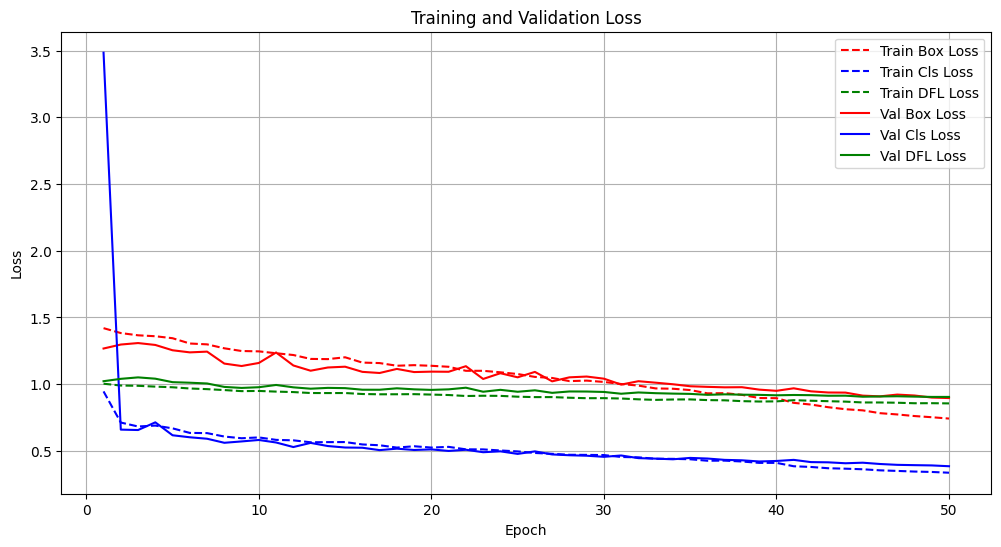

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ Loss trong quá trình Train và Validation
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='red', linestyle='--')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', color='blue', linestyle='--')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', color='green', linestyle='--')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='red')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', color='blue')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import shutil

# Đường dẫn đến mô hình đã huấn luyện
trained_model_path = "/content/runs/detect/train/weights/best.pt"  # Hoặc "last.pt"

# Đường dẫn lưu trên Google Drive
save_path = "/content/drive/MyDrive/best_yolov8_model.pt"  # Đặt tên file theo ý bạn

# Sao chép file mô hình vào Google Drive
shutil.copy(trained_model_path, save_path)

print(f"Model đã được lưu vào Google Drive tại: {save_path}")


Model đã được lưu vào Google Drive tại: /content/drive/MyDrive/best_yolov8_model.pt


# Test Model

In [ ]:
from ultralytics import YOLO
import cv2

path_1 = "/content/drive/MyDrive/best_yolov8_model.pt"
path_2 = "/content/drive/MyDrive/best_yolov11s_model.pt"
path_3 = "/content/drive/MyDrive/best_yolov11s_model_roboData.pt"

model_1 = YOLO(path_1)
model_2 = YOLO(path_2)
model_3 = YOLO(path_3)

img_path = "/content/drive/MyDrive/test_mau_ao.png"
img = cv2.imread(img_path)

video_path = "/content/drive/MyDrive/video.mp4"

In [ ]:
results_1 = model_1.predict(source=img_path,save=True)
results_2 = model_2.predict(source=img_path,save=True)
results_3 = model_3.predict(source=img_path,save=True)


image 1/1 /content/drive/MyDrive/test_mau_ao.png: 320x640 1 ball, 12 players, 60.1ms
Speed: 1.7ms preprocess, 60.1ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/test_mau_ao.png: 320x640 3 goalkeepers, 11 players, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict3

image 1/1 /content/drive/MyDrive/test_mau_ao.png: 608x1280 1 ball, 15 players, 1 referee, 16.6ms
Speed: 4.6ms preprocess, 16.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 1280)
Results saved to runs/detect/predict4


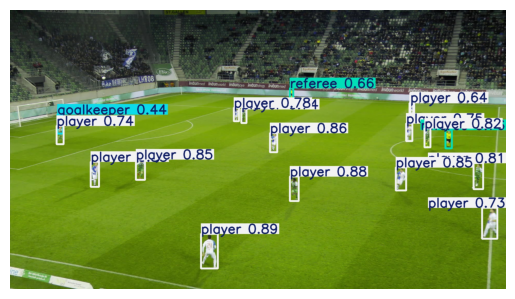

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Đọc ảnh đã dự đoán
predicted_image_path = "/content/runs/detect/predict/1.jpg"  # Đường dẫn ảnh đã dự đoán
img = cv2.imread(predicted_image_path)

# Hiển thị ảnh
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


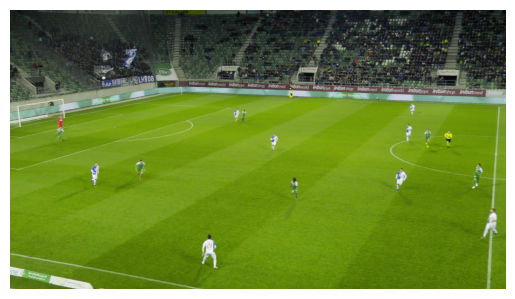

In [ ]:
# Hiển thị ảnh
img_url = "/content/drive/MyDrive/1.jpg"
img = cv2.imread(img_url)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()